<a href="https://colab.research.google.com/github/cata123/Machine-learning/blob/main/Clasificacion_de_imagenes_da%C3%B1o_mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Clasificación de imágenes con daños por mineria con red convolucional**
Integrantes: Laura Guzmán
            Fabian Duarte
            Nicolás Claros

In [ ]:
!pip install keras
import keras

In [ ]:

#Importar las librerias 
import numpy as np
import os
import re
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from tensorflow.keras.utils import to_categorical
#rom keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
#Cargar set de Imágenes
dirname = os.path.join(os.getcwd(), 'imagenesM')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:', len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirectorios:',sum(dircount))

leyendo imagenes de  /content/imagenesM/
/content/imagenesM/suelo 1
/content/imagenesM/paisaje 77
/content/imagenesM/agua 117
Directorios leidos: 3
Imagenes en cada directorio [78, 117, 73]
suma Total de imagenes en subdirectorios: 268


In [ ]:
#Creamos las etiquetas
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

impactos=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    impactos.append(name[len(name)-1])
    indice=indice+1
    
print('Array imagenes: ', len(images))
y = np.array(labels)
X = np.array([images], dtype=object) #convierto de lista a numpy
#X = np.asarray(images).astype(np.float32)

Cantidad etiquetas creadas:  268
0 suelo
1 paisaje
2 agua
Array imagenes:  268


In [ ]:
#Encontrar el número de cada etiqueta de entrenamiento
classes = np.unique(y)
nClasses = len(classes)
print('Total número de salidas : ', nClasses)
print('Output classes : ', classes)

print('Valor de X:', X.shape)
print('Valor de y:', y.shape)

X = X.reshape(X.shape[1:])
print('Valor de X:', X.shape)
X = X.transpose()
print(X.shape)

Total número de salidas :  3
Output classes :  [0 1 2]
Valor de X: (1, 268)
Valor de y: (268,)
Valor de X: (268,)
(268,)


In [ ]:
#Crear los grupos de entrenamiento
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (214,) (214,)
Testing data shape :  (54,) (54,)


In [ ]:
#Dividimos las imagenes en grupos para que sea mas facil el entrenamiento
train_X = train_X.astype('object')
test_X = test_X.astype('object')
train_X = train_X / 54.0
test_X = test_X / 54.0
 
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
 
# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
#División de la información a ser entrenada
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)
 
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

Original label: 0
After conversion to one-hot: [1. 0. 0.]
(171,) (43,) (171, 3) (43, 3)


In [ ]:
#Se definene las configuraciones de la red neuronal convolucional
INIT_LR = 1e-3
epochs = 6
batch_size = 64

sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))

sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5)) 
sport_model.add(Dense(nClasses, activation='softmax'))

sport_model.summary()

sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 21, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 21, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 14, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 11, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                157728    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32)               

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


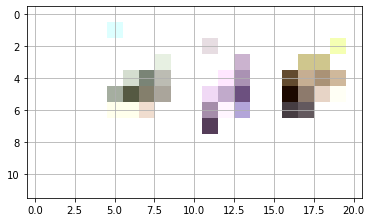

In [ ]:
plt.figure()
plt.imshow(train_X[80])
plt.grid(True)

In [ ]:
#Definición del modelo de las etapas con las capas de las neuronas para aprender
model = keras.Sequential([keras.layers.Flatten(input_shape = (21, 28)), keras.layers.Dense(32, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])

In [ ]:
#Evaluar el entrenamiento
#model.compile(optimizer = tf.train.AdamOptimizer(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Empezamos a entrenar
model.fit(train_X, train_Y, epochs = 5)

ValueError: ignored